In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# import urllib
# URL = 'http://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
# urllib.request.urlretrieve(URL, 'housing.csv')

In [2]:
data = pd.read_csv('housing.csv')
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

x_train = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value'].copy()

x_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

## Preprocessing

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

pip_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

pip_full = ColumnTransformer([
    ('num', pip_num, list(x_train)[:8]),
    ('cat', OneHotEncoder(), [list(x_train)[-1]])
])

x_train_prep = pip_full.fit_transform(x_train)
x_test_prep = pip_full.transform(x_test)

In [5]:
scalery = StandardScaler()
y_train = scalery.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = scalery.transform(np.array(y_test).reshape(-1, 1))

## Model

In [6]:
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

2023-03-23 16:21:57.094353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
r_l2 = keras.regularizers.l2(l2= .01)
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape = (13,)),
    # keras.layers.Dropout(rate=.2), 
    keras.layers.Dense(
        units=300, activation='relu', kernel_initializer='he_normal', kernel_regularizer=r_l2), 
    keras.layers.Dropout(rate=.2), 
    keras.layers.Dense(
        units=100, activation='relu', kernel_initializer='he_normal', kernel_regularizer=r_l2),
    keras.layers.Dropout(rate=.2), 
    keras.layers.Dense(
        units=50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=r_l2),
    keras.layers.Dropout(rate=.2),
    keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               4200      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

2023-03-23 16:21:58.183516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-23 16:21:58.204896: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-23 16:21:58.204997: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-23 16:21:58.205319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [8]:
model.compile(
    loss='mse', 
    optimizer='nadam',
    # metrics=['RSquare']
)

In [9]:
train = model.fit(x_train_prep, y_train,
          epochs=30,
          validation_split=0.2)

Epoch 1/30


2023-03-23 16:22:00.103459: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-23 16:22:00.105322: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x556fa1283d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-23 16:22:00.105334: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-23 16:22:00.111377: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-23 16:22:00.194068: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


413/413 [==============================] - 3s 4ms/step - loss: 6.3359 - val_loss: 3.6612
Epoch 2/30
413/413 [==============================] - 1s 3ms/step - loss: 2.4065 - val_loss: 1.4657
Epoch 3/30
413/413 [==============================] - 1s 3ms/step - loss: 1.0567 - val_loss: 0.7328
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.6049 - val_loss: 0.4939
Epoch 5/30
413/413 [==============================] - 1s 3ms/step - loss: 0.4520 - val_loss: 0.4029
Epoch 6/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3976 - val_loss: 0.3712
Epoch 7/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3752 - val_loss: 0.3556
Epoch 8/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3678 - val_loss: 0.3527
Epoch 9/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3608 - val_loss: 0.3473
Epoch 10/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3613 - val_loss: 0.3421
Epoch 11/3

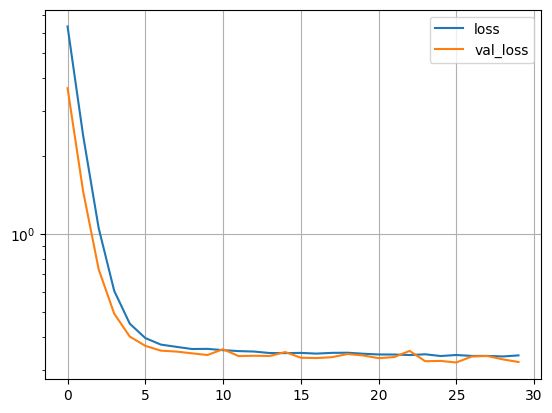

In [12]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.yscale('log')
plt.show()

In [10]:
model.evaluate(x_test_prep, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3157


0.31566324830055237